In [1]:
import os
print(os.getcwd())
os.chdir("../")
print("Directory Changed to : ",os.getcwd())

C:\Users\shiva\OneDrive\Desktop\LungDisease\Notebooks
Directory Changed to :  C:\Users\shiva\OneDrive\Desktop\LungDisease


In [2]:
# import os

# Set the input directory
input_directory = '/LungXRays-grayscale'

# Define the maximum number of files to display
max_files_to_display = 50
files_displayed = 0

def CheckDirectory(input_directory):
# Loop through all files and directories under the input directory
    for root, dirs, files in os.walk(input_directory):
        for filename in files:
        # Check if the file is not an image file (you can customize the list of image extensions)
            if not any(filename.lower().endswith(ext) for ext in ['.jpg' ]):
                print(os.path.join(root, filename))
            
            # Increment the counter
                files_displayed += 1
            
            # Check if the maximum number of files to display is reached
                if files_displayed >= max_files_to_display:
                    break
    # Check if the maximum number of files to display is reached
        if files_displayed >= max_files_to_display:
            break
CheckDirectory(input_directory)
print()

# 1) Introduction and Description:

## Dataset Overview:
The Lung Diseases X-Rays (Grayscale) dataset is a collection of grayscale X-ray images depicting various lung diseases, including COVID-19, pneumonia, tuberculosis, along with images of normal lungs. The dataset is designed for the development and evaluation of deep learning models focused on classifying lung diseases using medical imaging.

## Key Information:

Total Images: The dataset comprises a total of 8105 X-ray images.
Classes:
COVID-19
Pneumonia
Tuberculosis
Normal
Dataset Structure:
The dataset is organized into three main directories:

train: This directory contains images used for training machine learning models.
test: Images in this directory are reserved for testing the trained models.
val: Validation images are placed in this directory to assess model performance.
Each of these directories further categorizes images into subdirectories based on their respective classes, ensuring a balanced representation of images for each condition.

## Dataset Usage:
Researchers and practitioners can utilize this dataset to train, test, and validate machine learning or deep learning models focused on diagnosing lung diseases using medical imaging.

# 2) Data visualization

In [3]:
folder = os.listdir(os.getcwd())[0]


C:\Users\shiva\OneDrive\Desktop\LungDisease\LungXRays-grayscale\train\Corona_Virus_Disease C:\Users\shiva\OneDrive\Desktop\LungDisease
C:\Users\shiva\OneDrive\Desktop\LungDisease\LungXRays-grayscale\train\Normal C:\Users\shiva\OneDrive\Desktop\LungDisease
C:\Users\shiva\OneDrive\Desktop\LungDisease\LungXRays-grayscale\train\Pneumonia C:\Users\shiva\OneDrive\Desktop\LungDisease
C:\Users\shiva\OneDrive\Desktop\LungDisease\LungXRays-grayscale\train\Tuberculosis C:\Users\shiva\OneDrive\Desktop\LungDisease
C:\Users\shiva\OneDrive\Desktop\LungDisease\LungXRays-grayscale\test\Corona_Virus_Disease C:\Users\shiva\OneDrive\Desktop\LungDisease
C:\Users\shiva\OneDrive\Desktop\LungDisease\LungXRays-grayscale\test\Normal C:\Users\shiva\OneDrive\Desktop\LungDisease
C:\Users\shiva\OneDrive\Desktop\LungDisease\LungXRays-grayscale\test\Pneumonia C:\Users\shiva\OneDrive\Desktop\LungDisease
C:\Users\shiva\OneDrive\Desktop\LungDisease\LungXRays-grayscale\test\Tuberculosis C:\Users\shiva\OneDrive\Desktop\Lu

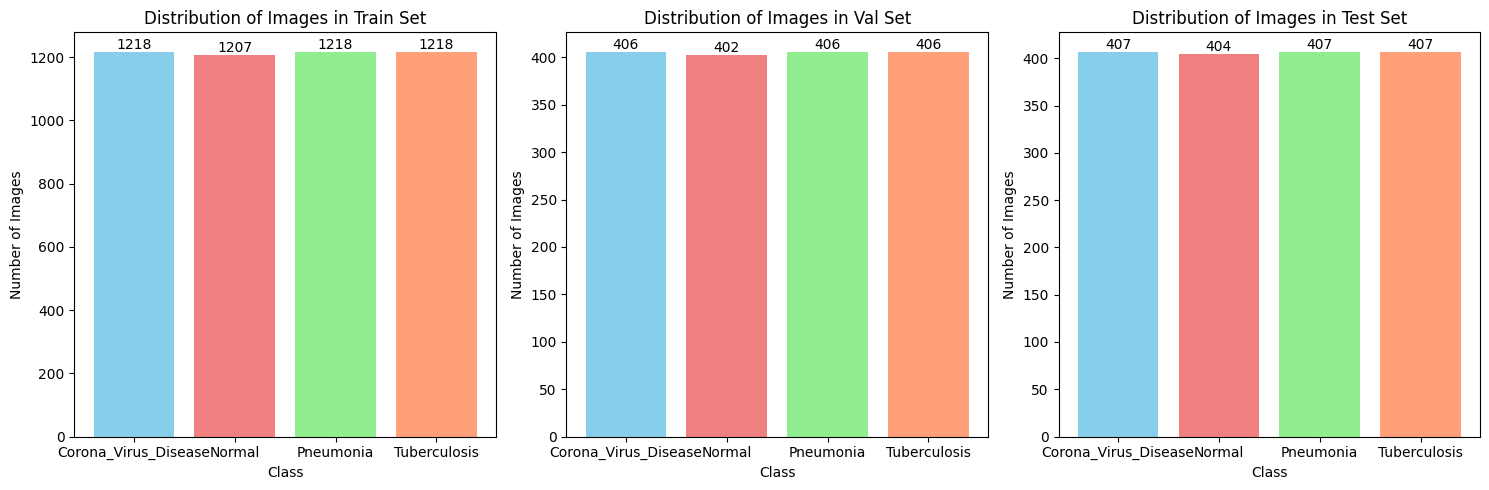

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np


folder = os.listdir(os.getcwd())[0]
# Main folder path
base_path = os.path.join(os.getcwd(),folder)

# Class names
class_names = ["Corona_Virus_Disease", "Normal", "Pneumonia", "Tuberculosis"]

# Dictionary to store the total number of images
class_counts = {class_name: {"train": 0, "val": 0, "test": 0} for class_name in class_names}

# Iterate through each subfolder
for subset in ["train", "test", "val"]:
    subset_path = os.path.join(base_path, subset)
    
    # Iterate through each class
    for class_name in class_names:
        class_path = os.path.join(subset_path, class_name)
        print(class_path,os.getcwd())
        # Find the number of images in the class
        num_images = len(os.listdir(class_path))
        
        # Update the total number of images
        class_counts[class_name][subset] = num_images

# Plotting the bar charts with different colors
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon']

for i, subset in enumerate(["train", "val", "test"]):
    classes = list(class_counts.keys())
    counts = [class_counts[class_name][subset] for class_name in classes]

    bars = axs[i].bar(classes, counts, color=colors)
    axs[i].set_title(f'Distribution of Images in {subset.capitalize()} Set')
    axs[i].set_xlabel('Class')
    axs[i].set_ylabel('Number of Images')

    # Add text labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [5]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


# 3) Data Augmentation and Dataset Preparation

# 4) Creating a Deep Learning Model

In [6]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

def create_and_train_model(train_path, val_path):
    img_height, img_width = 150, 150
    batch_size = 32
    epochs = 5

    # Data Augmentation
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )

    # Training data
    train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        color_mode='rgb',
        class_mode='categorical'
    )

    # Validation data
    val_generator = train_datagen.flow_from_directory(
        val_path,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        color_mode='rgb',
        class_mode='categorical'
    )

    # Model
    model = Sequential()
    model.add(Conv2D(filters=32, padding="same", kernel_size=(3, 3), activation="relu", input_shape=(img_height, img_width, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters=64, padding="same", kernel_size=(3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters=128, padding="same", kernel_size=(3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(units=256, activation="relu"))
    model.add(Dropout(0.5))

    model.add(Dense(units=512, activation="relu"))
    model.add(Dropout(0.5))

    num_classes = len(train_generator.class_indices)
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    # Define the EarlyStopping callback for monitoring validation accuracy
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

    # Training the model with early stopping based on validation accuracy
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=epochs,
        validation_data=val_generator,
        validation_steps=val_generator.samples // batch_size,
        callbacks=[early_stopping]  # Add the EarlyStopping callback
    )

    return model, history  # Eğitim geçmişini de döndür

# Model oluştur ve eğit
train_path = os.path.join(base_path, "train")
val_path = os.path.join(base_path, "val")
trained_model, training_history = create_and_train_model(train_path, val_path)

# Eğitim geçmişini görüntüle
print(training_history.history)


Found 4861 images belonging to 5 classes.
Found 1620 images belonging to 5 classes.


C:\Users\shiva\.conda\envs\DeeplungClassfication\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


C:\Users\shiva\.conda\envs\DeeplungClassfication\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


151/151 ━━━━━━━━━━━━━━━━━━━━ 110s 709ms/step - accuracy: 0.3087 - loss: 1.5112 - val_accuracy: 0.4869 - val_loss: 1.0817
Epoch 2/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - accuracy: 0.4062 - loss: 1.1565 - val_accuracy: 0.8000 - val_loss: 0.9864
Epoch 3/5


C:\Users\shiva\.conda\envs\DeeplungClassfication\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 105s 682ms/step - accuracy: 0.5205 - loss: 1.0425 - val_accuracy: 0.5156 - val_loss: 0.9800
Epoch 4/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 876us/step - accuracy: 0.5625 - loss: 0.8991 - val_accuracy: 0.6000 - val_loss: 1.0516
Epoch 5/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 105s 684ms/step - accuracy: 0.5708 - loss: 0.9422 - val_accuracy: 0.6131 - val_loss: 0.8844
{'accuracy': [0.3752329647541046, 0.40625, 0.5382066965103149, 0.5625, 0.5937047004699707], 'loss': [1.3190897703170776, 1.1565041542053223, 1.0168451070785522, 0.8990762233734131, 0.9015703201293945], 'val_accuracy': [0.4868749976158142, 0.800000011920929, 0.515625, 0.6000000238418579, 0.6131250262260437], 'val_loss': [1.0816550254821777, 0.9863830804824829, 0.9799889922142029, 1.0515625476837158, 0.8843837976455688]}


# 5) Checked Results: Evaluating the Performance of the Deep Learning Model

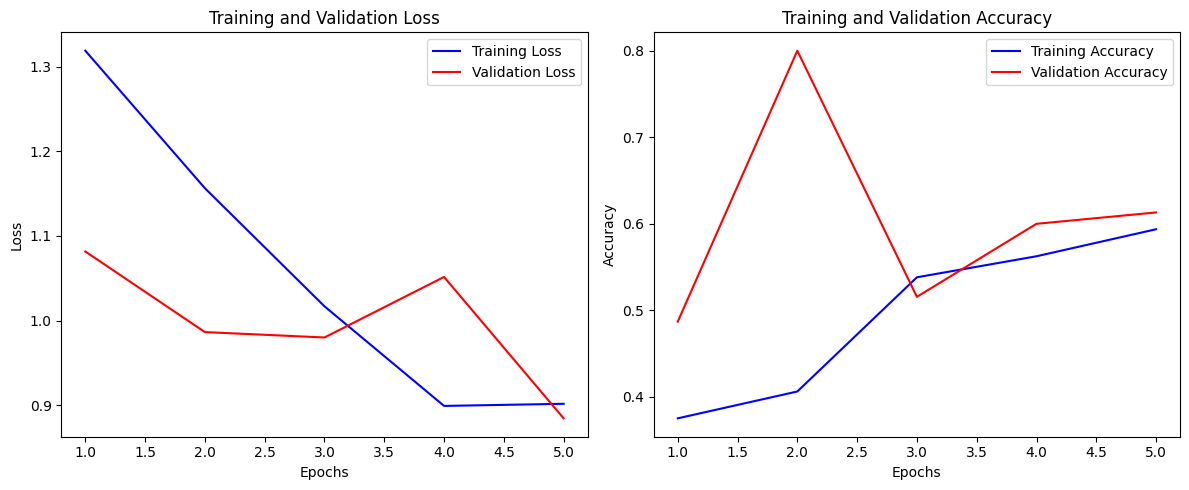

In [7]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Get loss and accuracy values for training and validation
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Get the number of epochs for training and validation
    epochs = range(1, len(train_loss) + 1)

    # Loss plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Kullanım örneği:
plot_training_history(training_history)


# 6) Save Model Weights After Training for Future Use

In [16]:
# Save the model
model_path = os.path.join(os.getcwd(),"Models")
print(model_path)

if not os.path.exists(model_path):
    os.makedirs(model_path)

MODEL_NAME = "LungDiseaseModel-CNN.keras"

full_model_path = os.path.join(model_path,MODEL_NAME)
trained_model.save(full_model_path)
os.listdir(model_path)

C:\Users\shiva\OneDrive\Desktop\LungDisease\Models


['LungDiseaseModel-CNN.h5', 'LungDiseaseModel-CNN.keras']

# 7) Make Predictions on Validation Data using the Saved Model Weights

In [17]:
img_height, img_width = 150, 150
batch_size = 32
epochs = 50
num_classes = len(os.listdir(train_path))

C:\Users\shiva\OneDrive\Desktop\LungDisease\LungXRays-grayscale


C:\Users\shiva\.conda\envs\DeeplungClassfication\lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


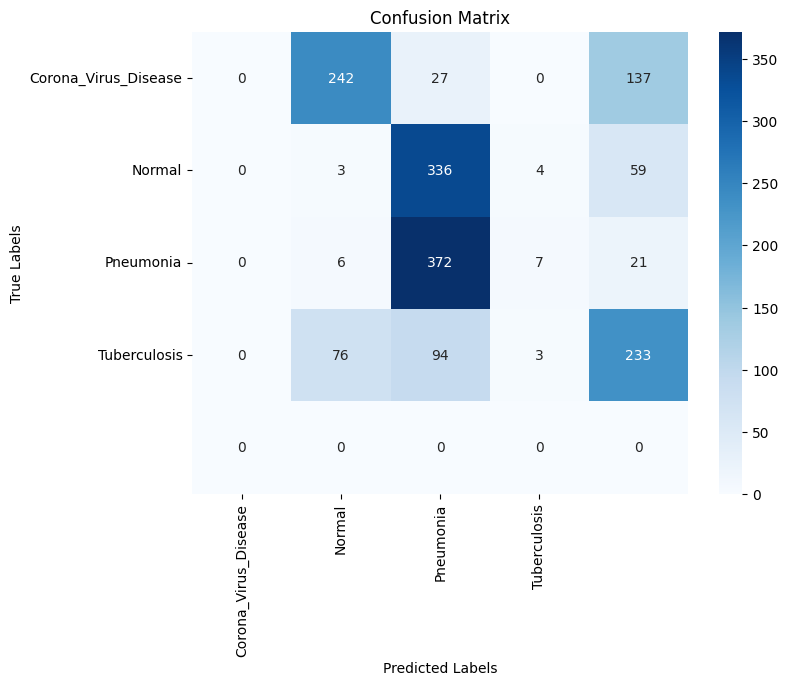

In [23]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Validation dataset path

base_path = os.path.join(os.getcwd(),folder)
print(base_path)
val_path = os.path.join(base_path,"val")

# Load the saved model
model_weight = load_model(full_model_path)

# Predictions and actual labels
predictions = []
labels = []

# Iterate through each class
for class_name in class_names:
    class_path = os.path.join(val_path, class_name)
    
    # Iterate through each image
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        
        # Load and resize the image
        img = image.load_img(img_path, target_size=(img_height, img_width))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0  # Normalization
        
        # Make a prediction
        prediction = model_weight.predict(img_array, verbose=0)
        predicted_class = np.argmax(prediction)
        
        # Add predictions and labels to the lists
        predictions.append(predicted_class)
        labels.append(class_names.index(class_name))

# Create the confusion matrix
cm = confusion_matrix(labels, predictions)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# 8) Further Actions and Enhancements

## 8.1 ) vizulation articure

C:\Users\shiva\.conda\envs\DeeplungClassfication\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


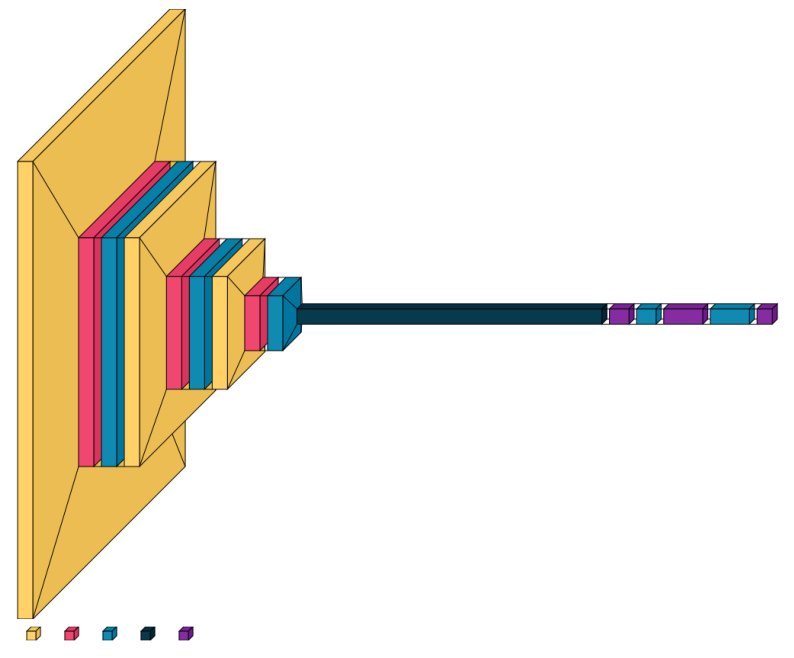

In [25]:
from PIL import ImageFont
import visualkeras
import matplotlib.pyplot as plt

# Modeli görselleştir
visual_keras_model = visualkeras.layered_view(model_weight, legend=True)

# Matplotlib figürü oluştur
fig, ax = plt.subplots(figsize=(10, 10))

# Görseli matplotlib figürüne ekleyin
ax.imshow(visual_keras_model)

# Eksenleri kapatın
ax.axis('off')

# Görseli kaydet
plt.savefig("model_visualization.png", bbox_inches='tight', pad_inches=0.1)
